# Libraries

In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings
from sklearn.svm import SVC
filterwarnings("ignore")

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
df = data.copy()

In [4]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
print(f"shape : {df.shape} size : {df.size}")

shape : (100000, 9) size : 900000


In [6]:
#review of repeated rows
df.duplicated().sum()

3854

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
print(f"shape : {df.shape} size : {df.size}")

shape : (96146, 9) size : 865314


In [9]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [10]:
#view of the number of null data in the columns
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [11]:
# view statistics of number type columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,96146.0,41.794326,22.462948,0.08,24.0,43.00,59.00,80.00
hypertension,96146.0,0.077601,0.267544,0.00,0.0,0.00,0.00,1.00
heart_disease,96146.0,0.040803,0.197833,0.00,0.0,0.00,0.00,1.00
bmi,96146.0,27.321461,6.767716,10.01,23.4,27.32,29.86,95.69
HbA1c_level,96146.0,5.532609,1.073232,3.50,4.8,5.80,6.20,9.00
blood_glucose_level,96146.0,138.218231,40.909771,80.00,100.0,140.00,159.00,300.00
diabetes,96146.0,0.088220,0.283616,0.00,0.0,0.00,0.00,1.00


In [12]:
# View statistics of categorical columns
df.select_dtypes(include="O").describe().T

,count,unique,top,freq
gender,96146,3,Female,56161
smoking_history,96146,6,never,34398


In [13]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [14]:
for col in df.columns:
    print(f"column name : {col}")
    print(df[col].value_counts())
    print("*"*30)

column name : gender
Female    56161
Male      39967
Other        18
Name: gender, dtype: int64
******************************
column name : age
80.00    4932
51.00    1566
47.00    1511
48.00    1508
53.00    1498
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: age, Length: 102, dtype: int64
******************************
column name : hypertension
0    88685
1     7461
Name: hypertension, dtype: int64
******************************
column name : heart_disease
0    92223
1     3923
Name: heart_disease, dtype: int64
******************************
column name : smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: smoking_history, dtype: int64
******************************
column name : bmi
27.32    21666
23.00      103
27.12      101
24.96      100
27.80      100
         ...  
58.23        1
48.18        1
55.57        1
57.07        1
60.52        1

In [15]:
df.groupby(["gender","age"])[["diabetes"]].count()

diabetes
gender age            
Female 0.08         17
       0.16         23
       0.24         44
       0.32         38
       0.40         34
...                ...
Other  45.00         1
       47.00         2
       52.00         1
       53.00         1
       55.00         1

[218 rows x 1 columns]

## Gender column

In [16]:
df = pd.get_dummies(data = df,columns =["gender"],drop_first=True)

In [17]:
df

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other
0,80.0,0,1,never,25.19,6.6,140,0,0,0
1,54.0,0,0,No Info,27.32,6.6,80,0,0,0
2,28.0,0,0,never,27.32,5.7,158,0,1,0
3,36.0,0,0,current,23.45,5.0,155,0,0,0
4,76.0,1,1,current,20.14,4.8,155,0,1,0
...,...,...,...,...,...,...,...,...,...,...
99994,36.0,0,0,No Info,24.60,4.8,145,0,0,0
99996,2.0,0,0,No Info,17.37,6.5,100,0,0,0
99997,66.0,0,0,former,27.83,5.7,155,0,1,0
99998,24.0,0,0,never,35.42,4.0,100,0,0,0


# Smoking_history

In [18]:
df = pd.get_dummies(data = df,columns =["smoking_history"],drop_first=True)

In [19]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,0,0,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,1,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,1,0,1,0,0,0,0


## Age column
### 100 particles to normalize the age column

In [20]:
df["age"] = df["age"]/100

In [21]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0.80,0,1,25.19,6.6,140,0,0,0,0,0,0,1,0
1,0.54,0,0,27.32,6.6,80,0,0,0,0,0,0,0,0
2,0.28,0,0,27.32,5.7,158,0,1,0,0,0,0,1,0
3,0.36,0,0,23.45,5.0,155,0,0,0,1,0,0,0,0
4,0.76,1,1,20.14,4.8,155,0,1,0,1,0,0,0,0


## Outlier cleaning

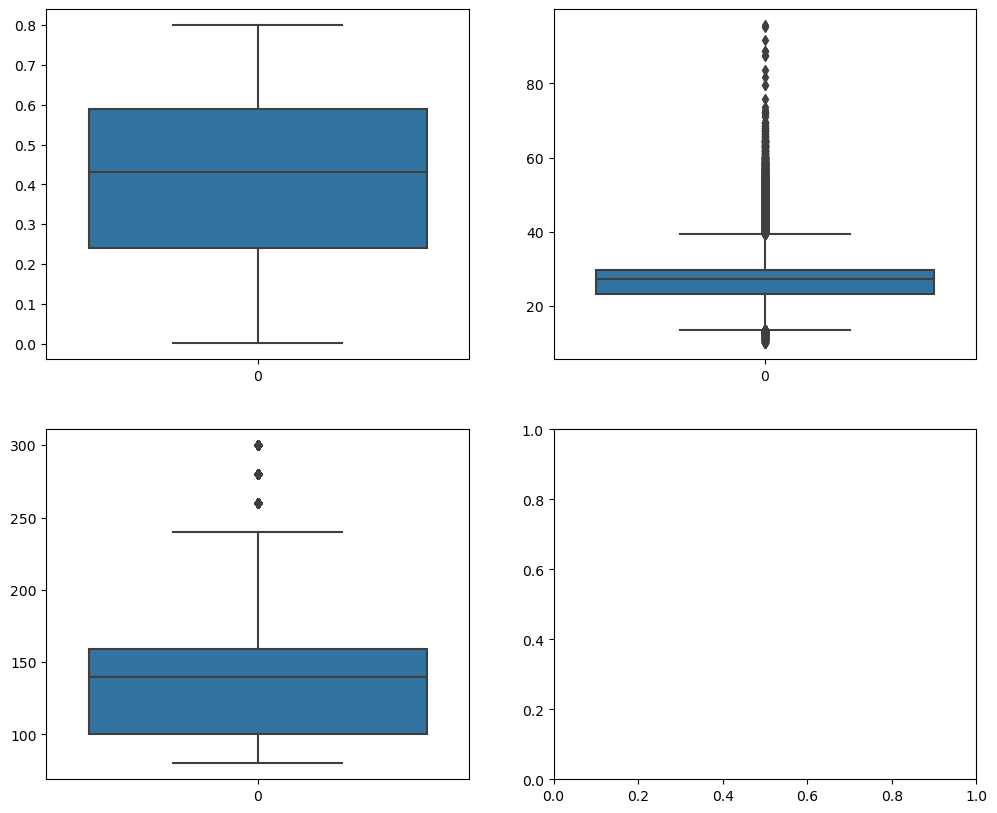

In [22]:
def box_show():
    fig,ax = plt.subplots(ncols=2,nrows = 2,figsize=(12,10))
    i=0
    j=0
    for col in ["age","bmi","blood_glucose_level"]:
        if j==2:
            i=i+1
            j=0
        sns.boxplot(df[col],ax=ax[i][j])
        j=j+1
box_show()

In [23]:
for col in ["age","bmi","blood_glucose_level"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    upper = Q3+IQR*1.5
    lower = Q1-IQR*1.5
    df[col] = df[col].apply(lambda x:  upper if x>upper else x)
    df[col] = df[col].apply(lambda x:  lower if x<lower else x)

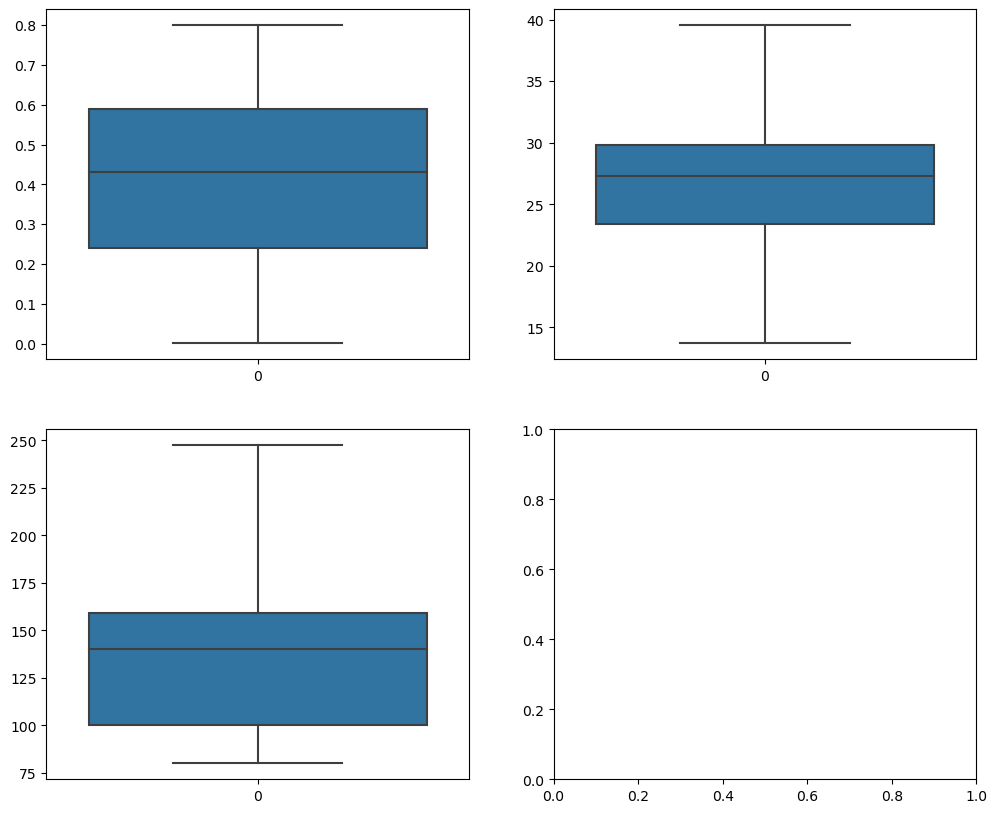

In [24]:
box_show()

In [25]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0.80,0,1,25.19,6.6,140.0,0,0,0,0,0,0,1,0
1,0.54,0,0,27.32,6.6,80.0,0,0,0,0,0,0,0,0
2,0.28,0,0,27.32,5.7,158.0,0,1,0,0,0,0,1,0
3,0.36,0,0,23.45,5.0,155.0,0,0,0,1,0,0,0,0
4,0.76,1,1,20.14,4.8,155.0,0,1,0,1,0,0,0,0


## Model building 

In [32]:
def model_train(model):
    X=df.drop(columns=["diabetes"])
    y=df["diabetes"]
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.fit_transform(X_test)
    mod = model.fit(X_train,y_train)
    y_pred = mod.predict(X_test)
    print(f"accuracy: {accuracy_score(y_test,y_pred)}",end="\n\n")
    print(f"confusion_matrix:\n {confusion_matrix(y_test,y_pred)}",end="\n\n")
    print(f"report: {classification_report(y_test,y_pred)}")

In [33]:
model_train(LogisticRegression(random_state=42))

accuracy: 0.9563182527301092

confusion_matrix:
 [[17332   177]
 [  663  1058]]

report:               precision    recall  f1-score   support

           0       0.96      0.99      0.98     17509
           1       0.86      0.61      0.72      1721

    accuracy                           0.96     19230
   macro avg       0.91      0.80      0.85     19230
weighted avg       0.95      0.96      0.95     19230



In [34]:
model_train(SVC())

accuracy: 0.959854394175767

confusion_matrix:
 [[17480    29]
 [  743   978]]

report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98     17509
           1       0.97      0.57      0.72      1721

    accuracy                           0.96     19230
   macro avg       0.97      0.78      0.85     19230
weighted avg       0.96      0.96      0.96     19230

